In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sps
import numpy as np
import seaborn as sn

### Load Data

In [3]:
#Load .csv & exclude aggregated footer data
#url = 'https://data.london.gov.uk/download/london-borough-profiles/c1693b82-68b1-44ee-beb2-3decf17dc1f8/london-borough-profiles.csv'
#df =  pd.read_csv(url,encoding='ANSI',skipfooter=5,engine='python',na_values=['.', 'n/a'])
df = pd.read_csv('london-borough-profiles.csv',
                 skipfooter=5, engine='python',
                 na_values=['.', 'n/a'])
df.head()

,Code,Area_name,Inner/_Outer_London,GLA_Population_Estimate_2017,GLA_Household_Estimate_2017,Inland_Area_(Hectares),Population_density_(per_hectare)_2017,"Average_Age,_2017","Proportion_of_population_aged_0-15,_2015","Proportion_of_population_of_working-age,_2015",...,Happiness_score_2011-14_(out_of_10),Anxiety_score_2011-14_(out_of_10),Childhood_Obesity_Prevalance_(%)_2015/16,People_aged_17+_with_diabetes_(%),Mortality_rate_from_causes_considered_preventable_2012/14,Political_control_in_council,Proportion_of_seats_won_by_Conservatives_in_2014_election,Proportion_of_seats_won_by_Labour_in_2014_election,Proportion_of_seats_won_by_Lib_Dems_in_2014_election,Turnout_at_2014_local_elections
0,E09000001,City of London,Inner London,8800,5326,290,30.3,43.2,11.4,73.1,...,6.0,5.6,NaN,2.6,129,NaN,NaN,NaN,NaN,NaN
1,E09000002,Barking and Dagenham,Outer London,209000,78188,"3,611",57.9,32.9,27.2,63.1,...,7.1,3.1,28.5,7.3,228,Lab,0.0,100.0,0.0,36.5
2,E09000003,Barnet,Outer London,389600,151423,"8,675",44.9,37.3,21.1,64.9,...,7.4,2.8,20.7,6.0,134,Cons,50.8,NaN,1.6,40.5
3,E09000004,Bexley,Outer London,244300,97736,"6,058",40.3,39.0,20.6,62.9,...,7.2,3.3,22.7,6.9,164,Cons,71.4,23.8,0.0,39.6
4,E09000005,Brent,Outer London,332100,121048,"4,323",76.8,35.6,20.9,67.8,...,7.2,2.9,24.3,7.9,169,Lab,9.5,88.9,1.6,36.3


### Summary Statistics

In [40]:
s_stats = df[['GLA_Population_Estimate_2017',
              'Median_House_Price,_2015',              
              'Proportion_of_population_of_working-age,_2015',
              'Employment_rate_(%)_(2015)',
              'Unemployment_rate_(2015)',              
              '%_working-age_with_a_disability_(2015)',   
              'People_aged_17+_with_diabetes_(%)',              
              '%_of_population_from_BAME_groups_(2016)',
              '%_of_resident_population_born_abroad_(2015)',
              '%_people_aged_3+_whose_main_language_is_not_English_(2011_Census)',
              'Proportion_of_working_age_people_with_no_qualifications_(%)_2015',
              'Proportion_of_working_age_with_degree_or_equivalent_and_above_(%)_2015',
              'Jobs_Density,_2015',
              'Number_of_cars_per_household,_(2011_Census)',
              'Average_Public_Transport_Accessibility_score,_2014',            
              'Total_carbon_emissions_(2014)',
              'Gross_Annual_Pay,_(2016)']]

s_stats = s_stats.rename(columns={'GLA_Population_Estimate_2017':
                                  'Borough Poulation',
                                  'Proportion_of_population_of_working-age,_2015':
                                  '% Working-age',
                                  '%_of_resident_population_born_abroad_(2015)':
                                  '% Foreign-born',
                                  '%_of_population_from_BAME_groups_(2016)':
                                  '% BAME',
                                  '%_people_aged_3+_whose_main_language_is_not_English_(2011_Census)':
                                  '% ESL',
                                  'Employment_rate_(%)_(2015)':
                                  '% Employment',
                                  'Unemployment_rate_(2015)':
                                  '% Unemployment',
                                  '%_working-age_with_a_disability_(2015)':
                                  '% Working-age w/ Disability',
                                  'Proportion_of_working_age_people_with_no_qualifications_(%)_2015':
                                  '% No Quals',
                                  'Gross_Annual_Pay,_(2016)':
                                  'Avg Annual Pay',
                                  'Jobs_Density,_2015':
                                  'Jobs Density',
                                  'Number_of_cars_per_household,_(2011_Census)':
                                  'Household Cars',
                                  'Average_Public_Transport_Accessibility_score,_2014':
                                  'Public Transport Access',
                                  'People_aged_17+_with_diabetes_(%)':
                                  '% w/ Adult Diabetes',
                                  'Proportion_of_working_age_with_degree_or_equivalent_and_above_(%)_2015':
                                  '% with Degree'
                                 })

pd.set_option('display.float_format', lambda x: '%.1f' % x)

### Demographic Stats

In [41]:
s_stats[['Borough Poulation',
         'Avg Annual Pay',
         '% Working-age',         
         '% Employment',
         '% Unemployment',
         '% ESL',
         '% BAME',
         '% with Degree',
         'Public Transport Access']].describe()

,Borough Poulation,Avg Annual Pay,% Working-age,% Employment,% Unemployment,% ESL,% BAME,% with Degree,Public Transport Access
count,33.0,31.0,33.0,33.0,32.0,33.0,33.0,32.0,33.0
mean,267739.4,34161.2,68.3,72.7,6.1,21.6,40.7,50.1,4.0
std,75383.3,3729.0,3.9,4.2,1.9,8.9,14.2,11.0,1.3
min,8800.0,27886.0,62.3,64.6,3.8,4.6,15.7,26.0,2.4
25%,231200.0,31829.5,64.9,69.2,4.6,16.9,30.4,43.2,3.0
50%,276200.0,33441.0,67.7,73.1,5.7,21.1,40.3,48.5,3.4
75%,321000.0,36510.5,72.1,75.4,7.6,28.0,49.9,58.8,4.9
max,389600.0,42141.0,75.3,79.6,11.0,41.4,73.1,69.5,7.9


### Boxplots

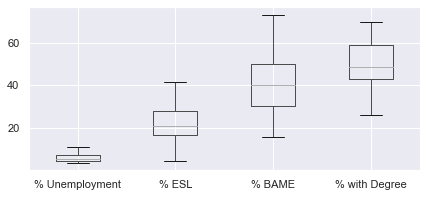

In [43]:
sn.set_theme( style='darkgrid', palette='deep', font_scale=1, color_codes=True, rc=None)
bplt = s_stats.boxplot(column=['% Unemployment','% ESL','% BAME','% with Degree'],
                        figsize=(7,3))



<AxesSubplot:>

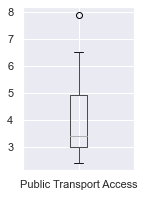

In [26]:
s_stats.boxplot(column=['Public Transport Access'],
                figsize=(2,3))

<AxesSubplot:>

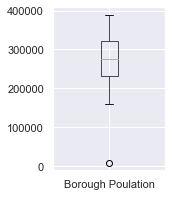

In [29]:
s_stats.boxplot(column=['Borough Poulation'],
                figsize=(2,3))

<AxesSubplot:>

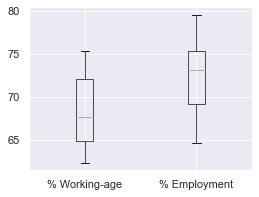

In [44]:
s_stats.boxplot(column=['% Working-age','% Employment'],
                figsize=(4,3))

<AxesSubplot:>

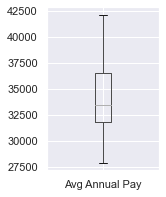

In [45]:
s_stats.boxplot(column=['Avg Annual Pay'],
                figsize=(2,3))

### Unmployment by Borough (1/2)

In [15]:
unemp = df[['Area_name',
            'Unemployment_rate_(2015)']]
unemp = unemp.rename(columns={'Area_name':'Borough',
                              'Unemployment_rate_(2015)':'Unemployment Rate'})

unemp.set_index('Borough', inplace = True)
pd.set_option('display.float_format', lambda x: '%.1f' % x)
unemp[0:16]

,Unemployment Rate
Borough,
City of London,NaN
Barking and Dagenham,11.0
Barnet,8.5
Bexley,7.6
Brent,7.5
Bromley,5.3
Camden,4.0
Croydon,4.1
Ealing,5.8


### Unmployment by Borough (2/2)

In [13]:
unemp[17:]

,Unemployment Rate
Borough,
Hounslow,4.3
Islington,4.5
Kensington and Chelsea,4.2
Kingston upon Thames,4.5
Lambeth,5.9
Lewisham,5.7
Merton,4.6
Newham,9.1
Redbridge,7.9


## Simple Regression

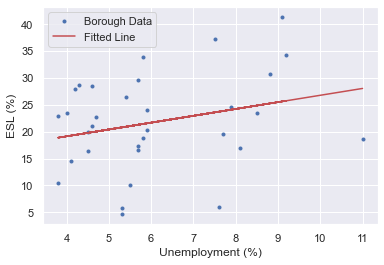

y = 1.273 x + 14.042
Rsq =  0.0715
p-value =  0.1391


In [51]:
# exclude City of London due to missing value
x = s_stats['% Unemployment'][1:]
y = s_stats['% ESL'][1:]

plt.xlabel('Unemployment (%)')
plt.ylabel('ESL (%)')

a = plt.plot(x, y, '.', label='Borough Data')

slope, intercept, r_value, p_value, std_err = sps.linregress(x, y)

b = plt.plot(x, x*slope + intercept, 'r', label = 'Fitted Line')

plt.legend()
plt.show()

print("y =", round(slope,3), "x +", round(intercept,3))
print("Rsq = ", round(r_value**2,4))
print("p-value = ", round(p_value,4))

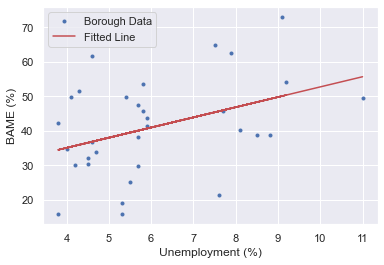

y = 2.949 x + 23.231
Rsq =  0.153
p-value =  0.0269


In [52]:
# exclude City of London due to missing value
x = s_stats['% Unemployment'][1:]
y = s_stats['% BAME'][1:]

plt.xlabel('Unemployment (%)')
plt.ylabel('BAME (%)')

a = plt.plot(x, y, '.', label='Borough Data')

slope, intercept, r_value, p_value, std_err = sps.linregress(x, y)

b = plt.plot(x, x*slope + intercept, 'r', label = 'Fitted Line')

plt.legend()
plt.show()

print("y =", round(slope,3), "x +", round(intercept,3))
print("Rsq = ", round(r_value**2,4))
print("p-value = ", round(p_value,4))

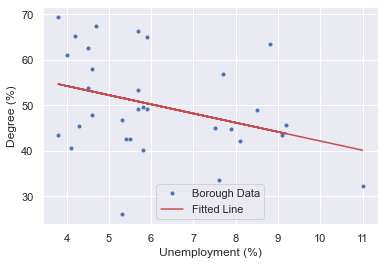

y = -2.021 x + 62.351
Rsq =  0.1204
p-value =  0.0517


In [53]:
# exclude City of London due to missing value
x = s_stats['% Unemployment'][1:]
y = s_stats['% with Degree'][1:]

plt.xlabel('Unemployment (%)')
plt.ylabel('Degree (%)')

a = plt.plot(x, y, '.', label='Borough Data')

slope, intercept, r_value, p_value, std_err = sps.linregress(x, y)

b = plt.plot(x, x*slope + intercept, 'r', label = 'Fitted Line')

plt.legend()
plt.show()

print("y =", round(slope,3), "x +", round(intercept,3))
print("Rsq = ", round(r_value**2,4))
print("p-value = ", round(p_value,4))

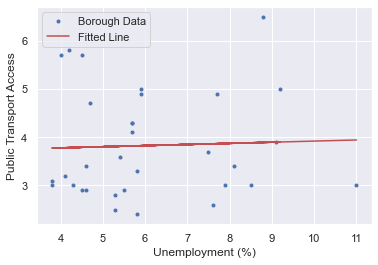

y = 0.023 x + 3.686
Rsq =  0.0016
p-value =  0.8298


In [54]:
# exclude City of London due to missing value
x = s_stats['% Unemployment'][1:]
y = s_stats['Public Transport Access'][1:]

plt.xlabel('Unemployment (%)')
plt.ylabel('Public Transport Access')

a = plt.plot(x, y, '.', label='Borough Data')

slope, intercept, r_value, p_value, std_err = sps.linregress(x, y)

b = plt.plot(x, x*slope + intercept, 'r', label = 'Fitted Line')

plt.legend()
plt.show()

print("y =", round(slope,3), "x +", round(intercept,3))
print("Rsq = ", round(r_value**2,4))
print("p-value = ", round(p_value,4))